IMPORTS

In [172]:
import collections
from collections import defaultdict
import os
import textract

import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')

import yake

from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image

import string
import sys

import pandas as pd
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial.distance import cosine

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicemahiant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


COUNTING FILES

In [101]:
path = "../tp4/datas/"
files = []
for name in os.listdir(path):
    if name.endswith(".txt"):
        files.append(name)
files = sorted(files)
len(files)

1631

FILES NAMES EXPLORER: EXAMPLE ON FIRST FILE

In [102]:
#fileName model
fileName = files [0]
type(fileName)

str

In [103]:
#split_method
fileName_split = fileName.split('_')
fileName_split

['KB', 'JB1051', '1925-10-31', '01-00002.txt']

In [104]:
#date_path
date = fileName_split[2]

#year_path
date_split = date.split('-')
year = date_split[0]

#convert year into decades
year[:3]
year[-1]
year[:3] + '0s'

'1920s'

SPLITTING FILES NAMES TO ACCESS NEWSLETTER NAME & DATE

In [105]:
all_years = [str(year) for year in range(1831, 1971)]

In [106]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_year = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_year [year] += 1
    else:
        print(f"Anomalous file: {f}")

COUNTING FILES BY NEWSLETTER NAME

In [107]:
#stat by newsletterName
print(f"Ce corpus comprend:")
print(f"- {count_newspapers ['JB838']} exemplaires du journal Le Soir")
print(f"- {count_newspapers ['JB638']} exemplaires de La Meuse")
print(f"- {count_newspapers ['JB427']} exemplaires de La Libre Belgique")
print(f"- {count_newspapers ['JB555']} exemplaires de l'Indépendance Belge")
print(f"- {count_newspapers ['JB572']} exemplaires du Journal de Charleroi")
print(f"- {count_newspapers ['JB1051']} exemplaires du journal Le Drapeau rouge")
print(f"- {count_newspapers ['JB567']} exemplaires du Journal de Bruxelles")
print(f"- {count_newspapers ['JB729']} exemplaires du Vingtième Siècle")
print(f"- {count_newspapers ['JB773']} exemplaires du journal Vers l'Avenir")
print(f"- {count_newspapers ['JB837']} exemplaires du journal Le Peuple")
print(f"- {count_newspapers ['JB421']} exemplaires de l'Avenir du Luxembourg")
print(f"- {count_newspapers ['JB685']} exemplaires du journal Le Petit Bleu")
print(f"- {count_newspapers ['JB555A']} exemplaires de L'Indépendance Belge (édité en Angleterre)")

Ce corpus comprend:
- 883 exemplaires du journal Le Soir
- 210 exemplaires de La Meuse
- 107 exemplaires de La Libre Belgique
- 80 exemplaires de l'Indépendance Belge
- 64 exemplaires du Journal de Charleroi
- 58 exemplaires du journal Le Drapeau rouge
- 52 exemplaires du Journal de Bruxelles
- 52 exemplaires du Vingtième Siècle
- 51 exemplaires du journal Vers l'Avenir
- 37 exemplaires du journal Le Peuple
- 27 exemplaires de l'Avenir du Luxembourg
- 10 exemplaires du journal Le Petit Bleu
- 0 exemplaires de L'Indépendance Belge (édité en Angleterre)


COUNTING FILES BY DECADES

In [108]:
#stat by decades
print(f"Ce corpus comprend:")
print(f"- {count_decade['1830s']} fichiers pour la décennie 1830s")
print(f"- {count_decade['1840s']} fichiers pour la décennie 1840s")
print(f"- {count_decade['1850s']} fichiers pour la décennie 1850s")
print(f"- {count_decade['1860s']} fichiers pour la décennie 1860s")
print(f"- {count_decade['1870s']} fichiers pour la décennie 1870s")
print(f"- {count_decade['1880s']} fichiers pour la décennie 1880s")
print(f"- {count_decade['1890s']} fichiers pour la décennie 1890s")
print(f"- {count_decade['1900s']} fichiers pour la décennie 1900s")
print(f"- {count_decade['1910s']} fichiers pour la décennie 1910s")
print(f"- {count_decade['1920s']} fichiers pour la décennie 1920s")
print(f"- {count_decade['1930s']} fichiers pour la décennie 1930s")
print(f"- {count_decade['1940s']} fichiers pour la décennie 1940s")
print(f"- {count_decade['1950s']} fichiers pour la décennie 1950s")
print(f"- {count_decade['1960s']} fichiers pour la décennie 1960s")
print(f"- {count_decade['1970s']} fichiers pour la décennie 1970s")

missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Ce corpus comprend:
- 0 fichiers pour la décennie 1830s
- 0 fichiers pour la décennie 1840s
- 5 fichiers pour la décennie 1850s
- 9 fichiers pour la décennie 1860s
- 7 fichiers pour la décennie 1870s
- 30 fichiers pour la décennie 1880s
- 80 fichiers pour la décennie 1890s
- 146 fichiers pour la décennie 1900s
- 111 fichiers pour la décennie 1910s
- 177 fichiers pour la décennie 1920s
- 306 fichiers pour la décennie 1930s
- 192 fichiers pour la décennie 1940s
- 238 fichiers pour la décennie 1950s
- 316 fichiers pour la décennie 1960s
- 14 fichiers pour la décennie 1970s
Années manquantes: 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1861, 1864, 1865, 1870, 1871, 1872, 1876, 1877, 1883, 1885, 1915, 1916, 1917


EXPLORING DATAS WITH SIMPLE BARCHART

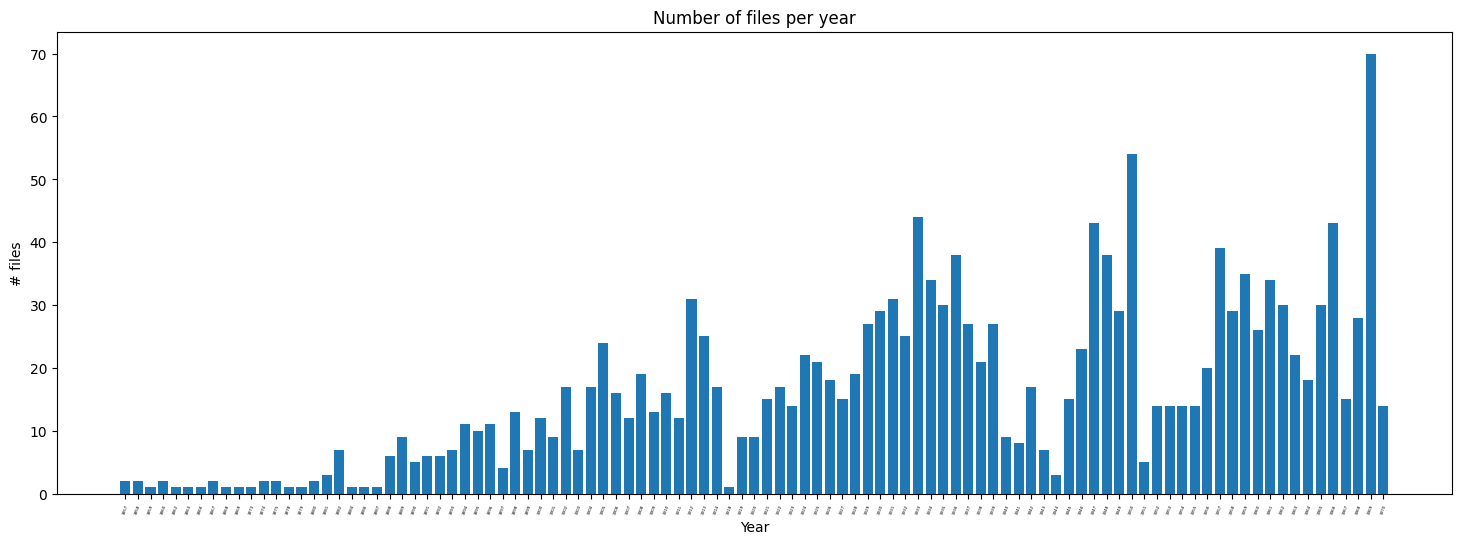

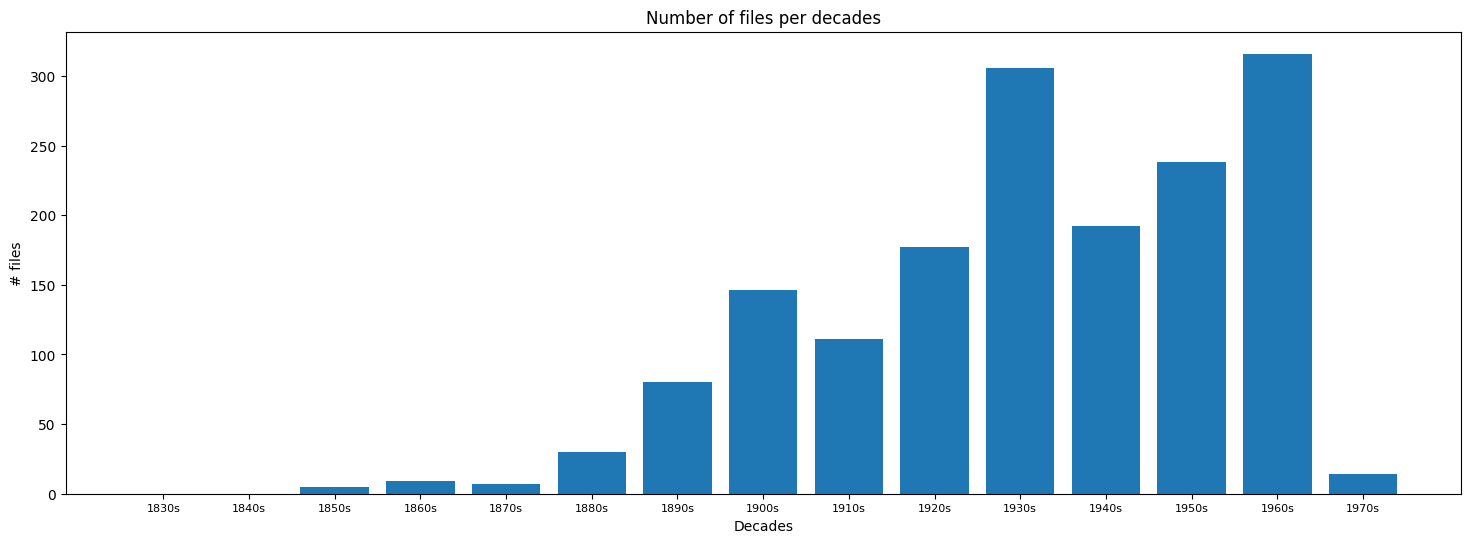

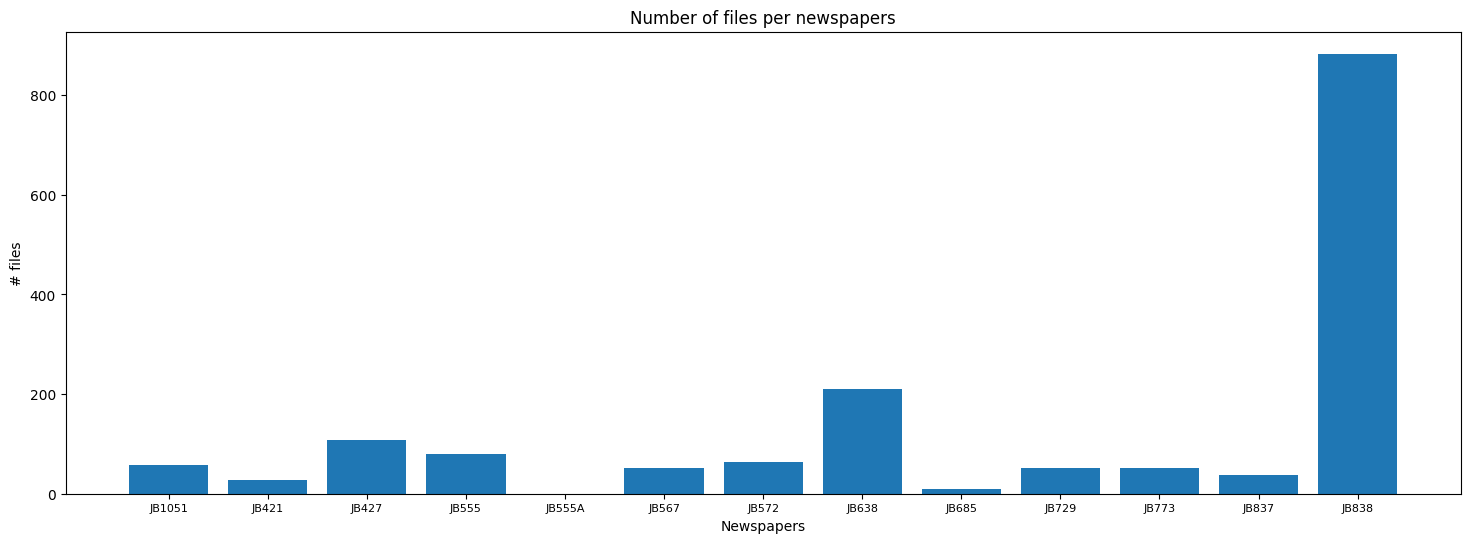

In [109]:
plt.rcParams['figure.figsize'] = [18, 6] # Change size of all graphics

ordered_years = sorted(count_year.keys())
ordered_count_years = [count_year[year] for year in ordered_years]

index = np.arange(len(count_year))
plt.bar(index, ordered_count_years)
plt.xlabel('Year')
plt.ylabel('# files')
plt.xticks(index, ordered_years, fontsize=3, rotation=70)
plt.title('Number of files per year')
plt.show()

ordered_decades = sorted(count_decade.keys())
ordered_count_decades = [count_decade[decade] for decade in ordered_decades]

index = np.arange(len(count_decade))
plt.bar(index, ordered_count_decades)
plt.xlabel('Decades')
plt.ylabel('# files')
plt.xticks(index, ordered_decades, fontsize=8, rotation=0)
plt.title('Number of files per decades')
plt.show()

ordered_newspapers = sorted(count_newspapers.keys())
ordered_count_newspapers = [count_newspapers[newspaper] for newspaper in ordered_newspapers]

index = np.arange(len(count_newspapers))
plt.bar(index, ordered_count_newspapers)
plt.xlabel('Newspapers')
plt.ylabel('# files')
plt.xticks(index, ordered_newspapers, fontsize=8, rotation=0)
plt.title('Number of files per newspapers')
plt.show()

PUTTING THE FILES IN A BIG txt CORPUS CALLED "all.txt"

In [110]:
!cat ../tp4/datas/*.txt > ../tp4/all/all.txt

COUNTING WORDS IN all.txt

In [111]:
!wc ../tp4/all/all.txt

       0 10441576 64227435 ../tp4/all/all.txt


CREATING A STOPWORDS LIST

In [112]:
sw = stopwords.words("french")
sw += ["afin", "aie", "ai", "ainsi", "allaient", "après", "au", "aux", "aussi", "auquel", "aura", "auront",
       "aux", "auxquels", "auxquelles", "avaient", "avais", "avait", "avec", "avoir", "ayant",
       "bien",
       "ça", "ceci", "cela", "celle", "celle-ci", "celle-là", "celui", "celui-ci", "celui-là", "cependant", "ces", "cet", "cette", 
       "ceux", "ceux-çi", "ceux-là", "chacun", "chaque", "chez", 
       "comme", "comment", "contre",
       "dans", "de", "delà", "depuis", "des", "dès", "desquels", "desquelles", "dire", "dit", "doit", "donc", "dont", "du", "duquel", "durant",
       "en", "encore", "entre", "environ", "est", "es", "étant", "être", "etc", 
       "faire", "fait", "faut", "feront", "font",
       "het",
       "ils",
       "jusqu", "jusque",
       "là", "la", "laquelle", "le", "lequel", "les", "lesquels", "lesquelles", "leur", "leurs", "lorsque", "lui",
       "mais", "malgré", "même", "mes", "mien", "miennes", "moins",
       "néanmoins", "non", "nos", "notre", "nôtre",
       "où", "ou", "outre",
       "parmi", "pas", "pendant", "peu", "peut", "plus",
       "quel", "quelle", "quelles", "quels", "quelques",
       "sans", "sauf", "se", "selon", "ses", "sous", "sur",
       "tel", "telle", "tels", "telles", "tien", "tienne", "tous", "tout", "toute", "toutes", "très", "trois",
       "une", "un",
       "van", "vers","vos", "vôtre", "vôtres"
       
       #sw for all contexts:
       # déterminants et pronoms
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "laquelle", "lequel", 
       "le", "leurs", "les", "plusieurs", "quelques", "toutes",

       # abréviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp",

       # divers
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi", "quand",

       #//////////////////////////////////////////////////////////////////////////
       #sw by specific contexts:
       # météo et temporalité
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi",

       #immobilier petites annonces
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine",

       # villes et lieux belges
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", 

       #job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
sw = set(sw)

In [113]:
#get the sw list
print(f"{len(sw)} stopwords:\n {sorted(sw)}")


477 stopwords:
 ['act', 'adr', 'afin', 'agence', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'allaient', 'alors', 'and', 'anderlecht', 'année', 'ans', 'anvers', 'août', 'app', 'appart', 'appartements', 'apr', 'après', 'ares', 'as', 'assez', 'au', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'aven', 'avenue', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bel', 'belge', 'belges', 'belgique', 'bien', 'bil', 'bilingue', 'bon', 'bonne', 'brabant', 'brux', 'bruxelles', 'bur', 'bureau', 'bxl', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celui', 'celui-ci', 'celui-là', 'centre', 'cependant', 'ces', 'cet', 'cette', 'ceux', 'ceux-là', 'ceux-çi', 'cft', 'chacun', 'chambres', 'chaque', 'charleroi', 'chauff', 'chaussée', 'chb', 'ch

TOKENISATION

In [114]:
#get file's content
path = "../tp4/all/all.txt"

with open(path) as f:
    text = f.read()

In [115]:
#tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

14194332 words found


GET NUMBER OF DIFFERENT TERMS (VOCABULARY)

In [116]:
#GETTING RID OF SW & NON-ALPHABETICAL TERMS
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept")
print(f" > {len(voc)} different word forms")

4548279 words kept
 > 457599 different word forms


STATISTICS ON WORDS: MOST FREQUENT/ HAPAX/ LONGEST

In [117]:
#get most frequent words
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('terre', 6576),
 ('grande', 6454),
 ('paris', 6270),
 ('lune', 6075),
 ('premier', 5517),
 ('vie', 5264),
 ('point', 5245),
 ('président', 5108),
 ('monde', 5105),
 ('gouvernement', 4970),
 ('général', 4965),
 ('mars', 4932),
 ('ministre', 4906),
 ('france', 4741),
 ('guerre', 4487),
 ('toujours', 4471),
 ('soleil', 4348),
 ('première', 4342),
 ('rien', 4321),
 ('devant', 4244),
 ('heure', 4127),
 ('dernier', 4043),
 ('moment', 3985),
 ('nord', 3912),
 ('conseil', 3861),
 ('nouvelle', 3858),
 ('quatre', 3721),
 ('petit', 3718),
 ('nouveau', 3716),
 ('voir', 3695)]

In [118]:
#get hapax
fdist.hapaxes()[:30]

['mmlll',
 'tmtmw',
 'wiiot',
 'ttiipiffi',
 'vnsoelea',
 'tooêpbé',
 'rlérido',
 'totée',
 'iioii',
 'ôbro',
 'prévaricateur',
 'démasquée',
 'tohéha',
 'ausso',
 'révooation',
 'judieaires',
 'malheurcaix',
 'sorvile',
 'concussionnaire',
 'dénonceront',
 'jrstico',
 'aooompojraé',
 'dtsconto',
 'appmséa',
 'pinances',
 'commtri',
 'qjé',
 'eauso',
 'ristournés',
 'toumo']

In [119]:
#get longest words
n = 300
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiuiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiililiiiiiiiiiiiiiiiiiiiiii',
 'llllllülilllllllllllllllllllllllllllllllllllllllllllllilllllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllulllllllllllllllllllllllllli',
 'lllllllllllllllllllllllilillllllllllllllllllllllllillllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllilllllllllllllllllllllllllllllllllllllm',
 'lllllllllllllllllillllllllllllllllllllllmiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiii',
 'illlllllllllllllilllillllltlllltllllllllllllllllllellllllllllllllllllllllelllllllllllllltllllllllltilltllllllllllllllllllllllllllllllllllllllllllllllllllll',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii

EXTRACTING KW: INSTANTIATION/ LISTING FILES

In [120]:
#instantiate the kw extractor
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [121]:
#listing files
data_path = "../tp4/datas"
files = os.listdir(data_path)

for fileName in files:
    if fileName.endswith("DS_Store"):
        print(f"Anomalous file: {fileName}")

Anomalous file: .DS_Store


In [122]:
#print nbr of identified files
len(files)

1632

EXTRACTING KW ON ONE FILE

In [123]:
#choosing a file
this_file = files[1]
this_file

'KB_JB838_1950-03-20_01-00004.txt'

In [124]:
#get file's text
text = open(os.path.join(data_path,this_file), 'r', encoding='utf8').read()
text[:500]

'4 LE sçm LUNDI 20 MARS 1950 LA VIE DANS LE PA YS ANVERS Départ vers le Congo Le navire « Mar del Plata » quittera le port à destination de Matadi mardi 21 mars. L’embarquement des passagers aura Heu au n* 214 des bassins, à 15 heures et non à 8 h. 30. BRUGES C A la mémoire de Joseph Muylle Une cérémonie s’est déroulée, dimanche midi, au Palais de justice, à la mémoire de l’ayoeat Muylle, major honoraire de réserve. On notait la présence du gouverneur van Outrvve d’Ydewalle, du général Duthoit, d'

In [125]:
#extracTing kw from this text
keywords = kw_extractor.extract_keywords(text)
keywords

[('Mar del Plata', 0.003997819280971551),
 ('LUNE', 0.007893900101031439),
 ('van', 0.009437842886725632),
 ('rue', 0.010371541629592522),
 ('LUNE PASCALE', 0.013715105806637986),
 ('Liège', 0.014155788852577733),
 ('ville', 0.014173727633251285),
 ('Matadi mardi', 0.01544645664106835),
 ('del Plata', 0.015460008724239872),
 ('destination de Matadi', 0.01550091391909344),
 ('MARS', 0.016119358663679306),
 ('ans', 0.016756666358287042),
 ('dimanche', 0.019917217129695627),
 ('s’est', 0.021143242646999755),
 ('d’un', 0.02116334711897629),
 ('Van Ackere', 0.023852013942768664),
 ('président', 0.02472861331593629),
 ('Joseph Muylle', 0.025496665302728087),
 ('pleine lune', 0.02559775696108791),
 ('général', 0.025921783184571716),
 ('bourgmestre', 0.027260025036460293),
 ('travaux', 0.02743220408865043),
 ('cours', 0.02806259611719105),
 ('Samedi', 0.03019377951413388),
 ('Mgr Van Waeyenbergh', 0.03028109893869179),
 ('Dimanche matin', 0.034136365850407226),
 ('Samedi soir', 0.0342750574236

In [126]:
#keeping the bi-grams only
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['LUNE PASCALE',
 'Matadi mardi',
 'del Plata',
 'Van Ackere',
 'Joseph Muylle',
 'pleine lune',
 'Dimanche matin',
 'Samedi soir',
 'directeur général',
 'ANVERS Départ',
 'Van Gogh',
 'cours d’une',
 'Mgr Van']

EXTRACTING KW FROM ALL FILES

In [127]:
#extracting kw from all files
#for f in sorted(files):
    #if f.endswith(".txt"):
        #print(f)
        #text = open(os.path.join(data_path, f), 'r').read()
        #keywords = kw_extractor.extract_keywords(text)
        #kept = []
        #for kw, score in keywords:
            #words = kw.split()
            #if len(words) == 2:
                #kept.append(kw)
        #print(f"{f} mentions these keywords: {', '.join(kept)}...")

EXTRACTING KW ON all.txt

In [128]:
# Lister les Fichiers
data_path = "../tp4/all"
files = os.listdir(data_path)

for fileName in files:
    if fileName.endswith("DS_Store"):
        print(f"Anomalous file: {fileName}")

Anomalous file: .DS_Store


In [129]:
len(files)
files

['allbis_clean.txt',
 'all.txt',
 '.DS_Store',
 'allbisbis_clean.txt',
 'allbis.txt',
 'tmp',
 'all_clean.txt']

In [130]:
this_file = files[4]
this_file

'allbis.txt'

In [131]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path,this_file), 'r', encoding='utf8').read()
text[:500]

"LE DRAPEAU ROUGE Faits Divers accidenta de la rue à Bruxelles. - Urne oolllision est sunrvacme,, mardi soir, -aura io tnam n° 83 et' ratts&ge oofvduit. par la omnioniieur Louis Henrunit, domi- ,.-.£\\_é m de Florenne, 42, à Ixelles, au tjÊmtmt des rues de Savoie et de Lom- bfxnâje» à .fiaant-GiJiles. Le choc a été violent. Hawoaiut a été projeté à terre et ! ; .>eaaé à Im jambe. Des soins lui ont été .v.vxJigués à l'hôpital de l'avenue Molière. î es dégite matériels sont assez élevés. 'URUATiNE S"

In [132]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('vous faire part', 5.13733220349991e-07),
 ('cours d’une conférence', 5.870744999549134e-07),
 ('Bruxelles', 8.173699651381085e-07),
 ('New York Times', 8.799529097492326e-07),
 ('lune', 1.0268587331632823e-06),
 ('rue Jean Van', 1.0279811988101632e-06),
 ('BRUXELLES Vendredi BRUXELLES', 1.1458272872269507e-06),
 ('Société royale belge', 1.2967978760799795e-06),
 ('New York', 1.52219922312614e-06),
 ('York Times News', 1.5934282419783401e-06),
 ('Nouvelle lune', 1.663586938254481e-06),
 ('Belgique', 1.7990098638415011e-06),
 ('CONGO BELGE', 1.97428958293703e-06),
 ('RUE ROYALE FRANCE', 2.0555391805765104e-06),
 ('terre', 2.1040335774380785e-06),
 ('Lune Cap Kennedy', 2.138330833614404e-06),
 ('Times News Service', 2.212642700473421e-06),
 ('Bruxelles Miss Belgique', 2.28306431020893e-06),
 ('Bruxelles lundi soir', 2.3499140616593273e-06),
 ('cours d’une', 2.426978556060223e-06),
 ('Paris', 2.5041971844824615e-06),
 ('Van', 2.8340276869596826e-06),
 ('vous', 2.8819889250175053e-06),
 

In [133]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['New York',
 'Nouvelle lune',
 'CONGO BELGE',
 'cours d’une',
 'vous vous',
 'heure belge',
 'rue Royale',
 'dimanche soir',
 'rue Van',
 'Paris Paris',
 'Bruxelles Paris',
 'Jeudi soir']

WORDCLOUDS ON SPECIFIC YEARS

In [134]:
#sw list
sw = stopwords.words("french")
sw += [#sw for all contexts:
       # déterminants et pronoms
       "celle", "celui", "cet", "cette", "ceux", "chaque", "elles", "ils", "la", "laquelle", "lequel", 
       "le", "leurs", "les", "plusieurs", "quelques", "toutes",

       # abréviations
       "réf", "rens", "sal", "eng", "puis", "déjà", "tel", "apr", "sal",
       "mat", "mén", "chf", "rem", "fem",  "cft", "poss", "conf", "aven",
       "coiff", "sit", "bil", "jrs", "adr", "dem", "trav", "mod", "comm",
       "pet", "chauff", "maz", "act", "serv", "pts", "env", "emp", "max",
       "curr", "ouv", "rapp",

       # divers
       "plus", "fait", "faire", "être", "deux", "comme", "dont", "tout","pendant", 
       "moins", "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", 
       "doit", "contre", "depuis", "autres",  "hommes", "dames", "homme", "chez",
       "cependant", "car", "fille", "van", "het", "entre", "encore", "autre", 
       "jusqu", "monsieur", "dame", "etc", "vis", "avant", "lieu", "peu", "jean", 
       "dès", "voit", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", 
       "sous", "toute", "fois", "trop", "dés", "femme", "assez", "très", "alors",
       "mme", "vers", "pierre", "belges", "and", "demi", "quand",

       #//////////////////////////////////////////////////////////////////////////
       #sw by specific contexts:
       # météo et temporalité
       "année", "pays", "temps", "samedi", "saint", "jour", "septembre", "sept",
       "octobre", "novembre", "décembre", "janvier", "février", "avril", 
       "mai", "juin", "juillet", "août", "sam", "samedi", "matin", "midi", "fin", 
       "dimanche", "lundi", "mardi", "mercredi", "jeudi", "vendredi",

       #immobilier petites annonces
       "ville", "rossel", "app", "ter", "tél", "rue", "maison", "villa", "porte", 
       "avenue", "chb", "prix", "agence", "appart", "liv", "téléph", "louer", "terr", 
       "centre", "terrain", "grand", "cuis", "libre", "cours", "part", "ares", 
       "étage", "lib", "grd", "belge", "belgique", "prés", "place", "chff", "bel", 
       "rez", "offre", "vendre", "garage", "sdb", "parc", "jardin", "lux", "vente", 
       "francs", "int", "imm", "près", "salle", "vue", "enfants", "eau", "situation", 
       "tour", "sud", "appartements", "chambres", "recherche", "jard", "gar", "hall",
       "chée", "flats", "faç", "chaussée", "quartier", "cuisine",

       # villes et lieux belges
       "waterloo", "namur", "anvers", "charleroi", "liège", "anderlecht",
       "uccle", "louise", "bruxelles", "brux", "forest", "schaerbeek", "bxl", 
       "ixelles", "brabant", "wavre", "louvain", "gand", "woluwe", "lambert",
       "mons", "jette", 

       #job
       "demande", "agence", "heures", "service", "ans", "engage", "ecr", "bilingue", 
       "mois", "ecrire", "madame", "présenter", "jours", "soir", "bur", "bureau", 
       "cherche", "bon", "bonne", "travail", "téléphone", "dactylo", "hres", "jeune",
       "vitae", "curriculum", "français", "semaine", "expérience", "sem", "jeunes",
       "pers", "serveuse", "min", "jne", "cond"]
       
sw = set(sw)

In [135]:
#choosing a year
year = 1965

In [136]:
#listing this year's files
data_path = '../tp4/datas'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and str(year) in f]
txts

['KB_JB838_1965-07-15_01-00006.txt',
 'KB_JB838_1965-01-29_01-00002.txt',
 'KB_JB838_1965-02-21_01-00004.txt',
 'KB_JB838_1965-08-15_01-00003.txt',
 'KB_JB838_1965-07-14_01-00007.txt',
 'KB_JB838_1965-08-24_01-00003.txt',
 'KB_JB838_1965-07-30_01-00007.txt',
 'KB_JB838_1965-08-29_01-00002.txt',
 'KB_JB838_1965-10-07_01-00002.txt',
 'KB_JB838_1965-10-22_01-00005.txt',
 'KB_JB838_1965-06-15_01-00003.txt',
 'KB_JB838_1965-07-18_01-00001.txt',
 'KB_JB838_1965-12-17_01-00003.txt',
 'KB_JB838_1965-08-28_01-00003.txt',
 'KB_JB838_1965-07-18_01-00004.txt',
 'KB_JB838_1965-06-15_01-00004.txt',
 'KB_JB838_1965-01-23_01-00003.txt',
 'KB_JB838_1965-06-06_01-00003.txt',
 'KB_JB838_1965-03-25_01-00001.txt',
 'KB_JB838_1965-08-08_01-00005.txt',
 'KB_JB838_1965-12-31_01-00007.txt',
 'KB_JB838_1965-11-19_01-00009.txt',
 'KB_JB838_1965-06-08_01-00003.txt',
 'KB_JB838_1965-12-19_01-00003.txt',
 'KB_JB838_1965-05-14_01-00007.txt',
 'KB_JB838_1965-07-20_01-00003.txt',
 'KB_JB838_1965-07-17_01-00004.txt',
 

In [137]:
#putting files content in a list
content_list = []
for txt in txts:
    with open(os.path.join(data_path, txt), 'r', encoding='utf8') as f:
        content_list.append(f.read())

In [138]:
#counting nbr of files in the list
len(content_list)

30

In [139]:
#writing content in a temp_file
temp_path = './all/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf8') as f:
    f.write(' '.join(content_list))

In [140]:
#print file's content
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf8') as f:
    before = f.read()

before[:500]

'NÉCROLOGIE t Monsieur Edmond DRECHSEL, Monsieur et Madame Max DRECHSEL - DEVOS, Monsieur et Madame Otbon DRECHSEL - MAREULE, Monsieur et Madame Willy VAN HOREBEKE - DRECHSEL, Madame Henriette LANDA - DRECHSEL, Monsieur et Madame Michel SXIERNET - DRECHSEL et leu» enfants. Mademoiselle Jeanne DRECHSEL, Madame Lily SMAL-HAVERLAND, Monsieur et Madame Jean HAVERLAND et leur fils. Monsieur Jacques HAVERLAND, Monsieur Camille DRECHSEL, ont la douleur de vous faire part du décès de MADAME Edmond DRECHS'

In [141]:
#cleaning content
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [142]:
#putting clean file in the temp_file
clean_text(year, folder=temp_path)

'Output has been written in ./all/tmp/1965_clean.txt!'

In [143]:
#check results
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf8') as f:
    after = f.read()

after[:500]

'nécrologie edmond drechsel drechsel devos otbon drechsel mareule willy horebeke drechsel henriette landa drechsel michel sxiernet drechsel leu mademoiselle jeanne drechsel lily smal haverland haverland fils jacques haverland camille drechsel douleur décès edmond drechsel née adellna bodson épouse mère belle mère mère arrière mère tante tante née décédée lan denne meuse munie secours religion funérailles intimité conformément volonté défunte deuil porté landenne meuse repos charles warocqué esneu'

In [144]:
#get most common words (x10)
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('président', 196), ('général', 182), ('premier', 172), ('ministre', 166), ('gouvernement', 160), ('voiture', 122), ('gemini', 120), ('terre', 119), ('politique', 118), ('etats', 116)]


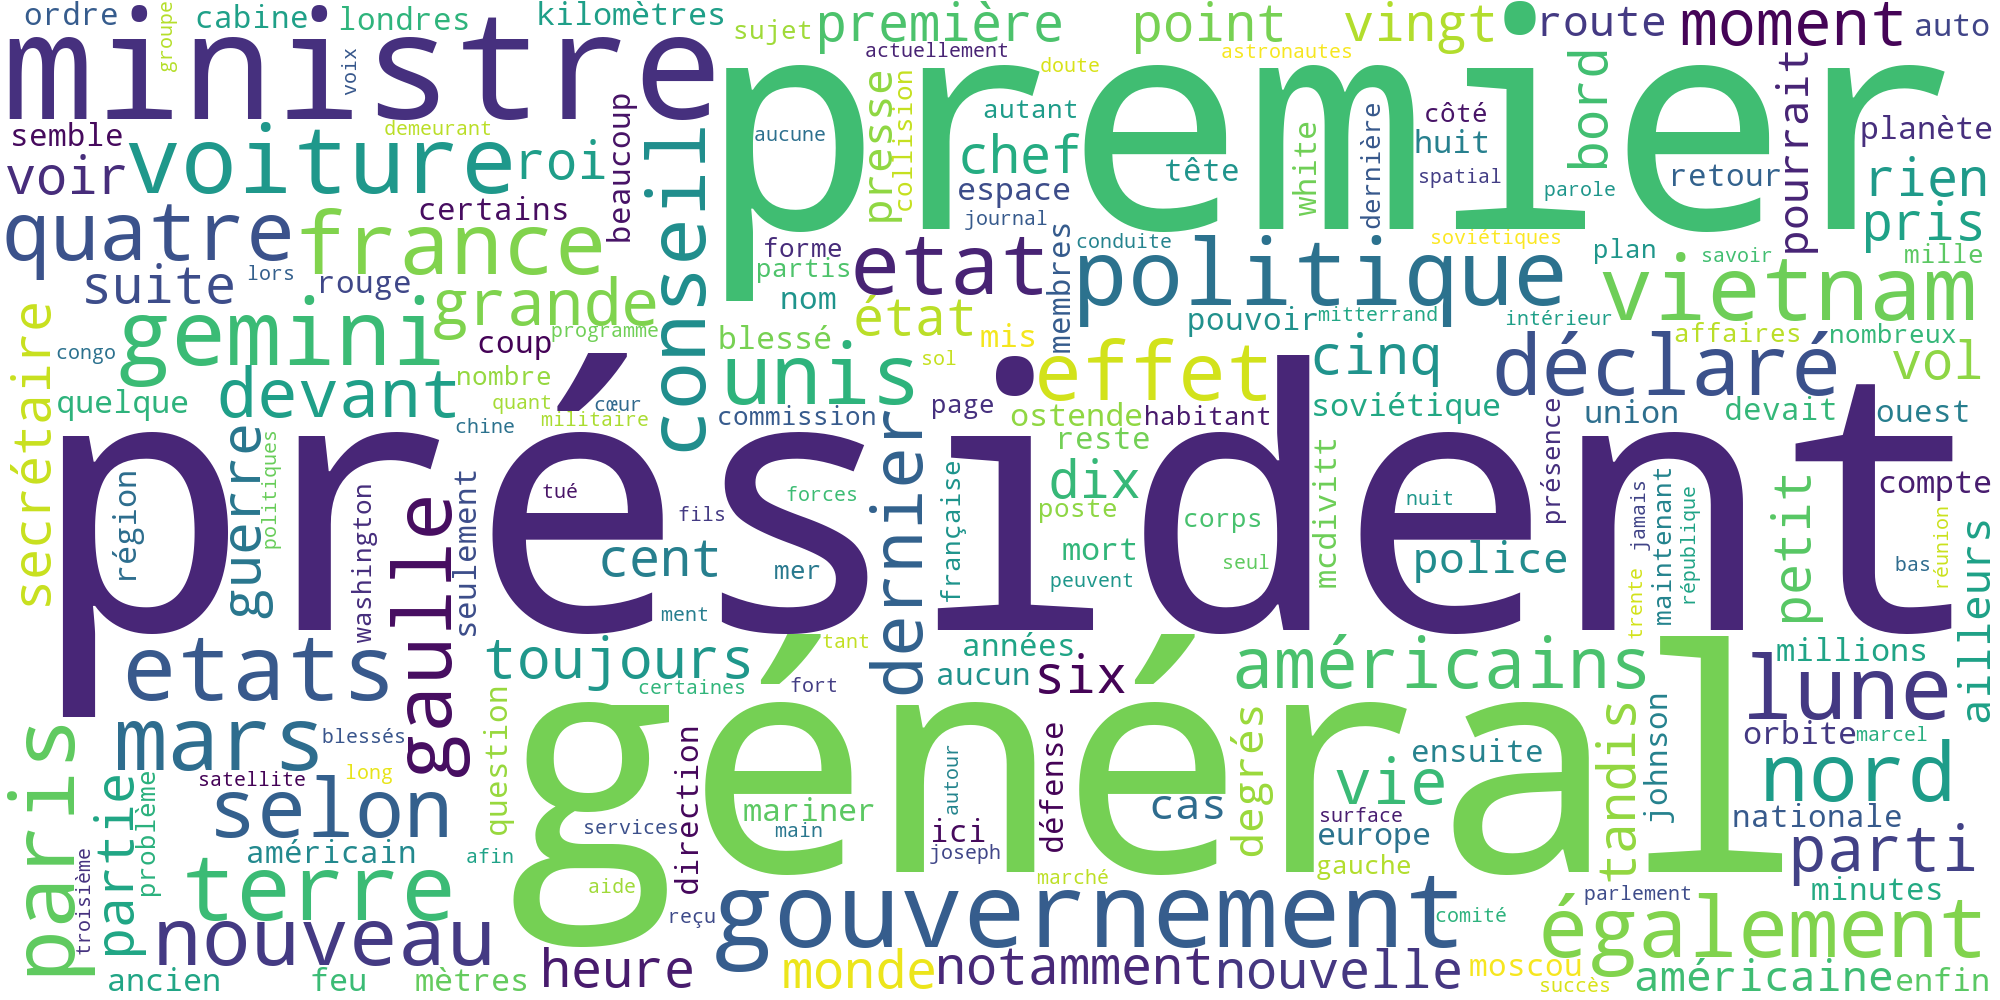

In [145]:
#creating a wc and saving it in temp
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

WORDCLOUD ON ALL THE FILES

In [146]:
#choosing file
data_path = '../tp4/all'
txts = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
txts

['allbis_clean.txt',
 'all.txt',
 '.DS_Store',
 'allbisbis_clean.txt',
 'allbis.txt',
 'all_clean.txt']

In [147]:
len(txts)

6

In [148]:
#print file's content
with open(os.path.join(data_path, f'all.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

".'■ HE! WW.'i I MMlll l Wil l lMJ i iH'-g-H tMTMW*lItr «ouoi i ' tai.i i 'ji'WiiOT' i' ttiipiffi'.i'^ lions, en même temps qu'il y combinait VI o fructueuses ut faire* de publicité et de presse! S. M. .Vnsoelea cédé aux instances dos pu i* sait ta protecteurs et des puissantes protectrices de M. Joset, si M. Anseele o tooêpbé de jouer la comédie de la remise lu dossier au parquet afin que celui-ci rlérido dos sanctions quo comportent lea totée délictueux du directeur d'adminis- ta.i*iioii Joset,"

In [149]:
#cleaning content
def clean_text(test, folder=None):
    if folder is None:
        input_path = f"{test}.txt"
        output_path = f"{test}_clean.txt"
    else:
        input_path = f"{folder}/{test}.txt"
        output_path = f"{folder}/{test}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [150]:
clean_text("all", folder=data_path)

'Output has been written in ../tp4/all/all_clean.txt!'

In [151]:
#check result
with open(os.path.join(data_path, f'all_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'MMLLL WIL LMJ TMTMW LITR OUOI TAI WIIOT TTIIPIFFI LIONS COMBINAIT FRUCTUEUSES PUBLICITÉ PRESSE VNSOELEA CÉDÉ INSTANCES DOS SAIT PROTECTEURS PUISSANTES PROTECTRICES JOSET ANSEELE TOOÊPBÉ JOUER COMÉDIE REMISE DOSSIER PARQUET AFIN RLÉRIDO DOS SANCTIONS QUO COMPORTENT LEA TOTÉE DÉLICTUEUX DIRECTEUR ADMINIS IIOII JOSET VRAIMENT ÔBRO NAÏF CROIRE MAGISTRATS CHARGÉS BESOGNE OSERONT FRAPPER PRÉVARICATEUR SUBORDONNÉS MINISTRE JUSTICE TUNI AVOCAT JOSET DÉPENDENT AVANCEMENT PROTECTEURS FRIPOUILLE DÉMASQUÉE '

In [152]:
#get most common words (x10)
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('TERRE', 6576), ('GRANDE', 6454), ('PARIS', 6270), ('LUNE', 6075), ('PREMIER', 5517), ('VIE', 5264), ('POINT', 5245), ('PRÉSIDENT', 5108), ('MONDE', 5105), ('GOUVERNEMENT', 4970), ('GÉNÉRAL', 4965), ('MARS', 4932), ('MINISTRE', 4906), ('FRANCE', 4741), ('GUERRE', 4487), ('TOUJOURS', 4471), ('SOLEIL', 4348), ('PREMIÈRE', 4342), ('RIEN', 4321), ('DEVANT', 4244)]


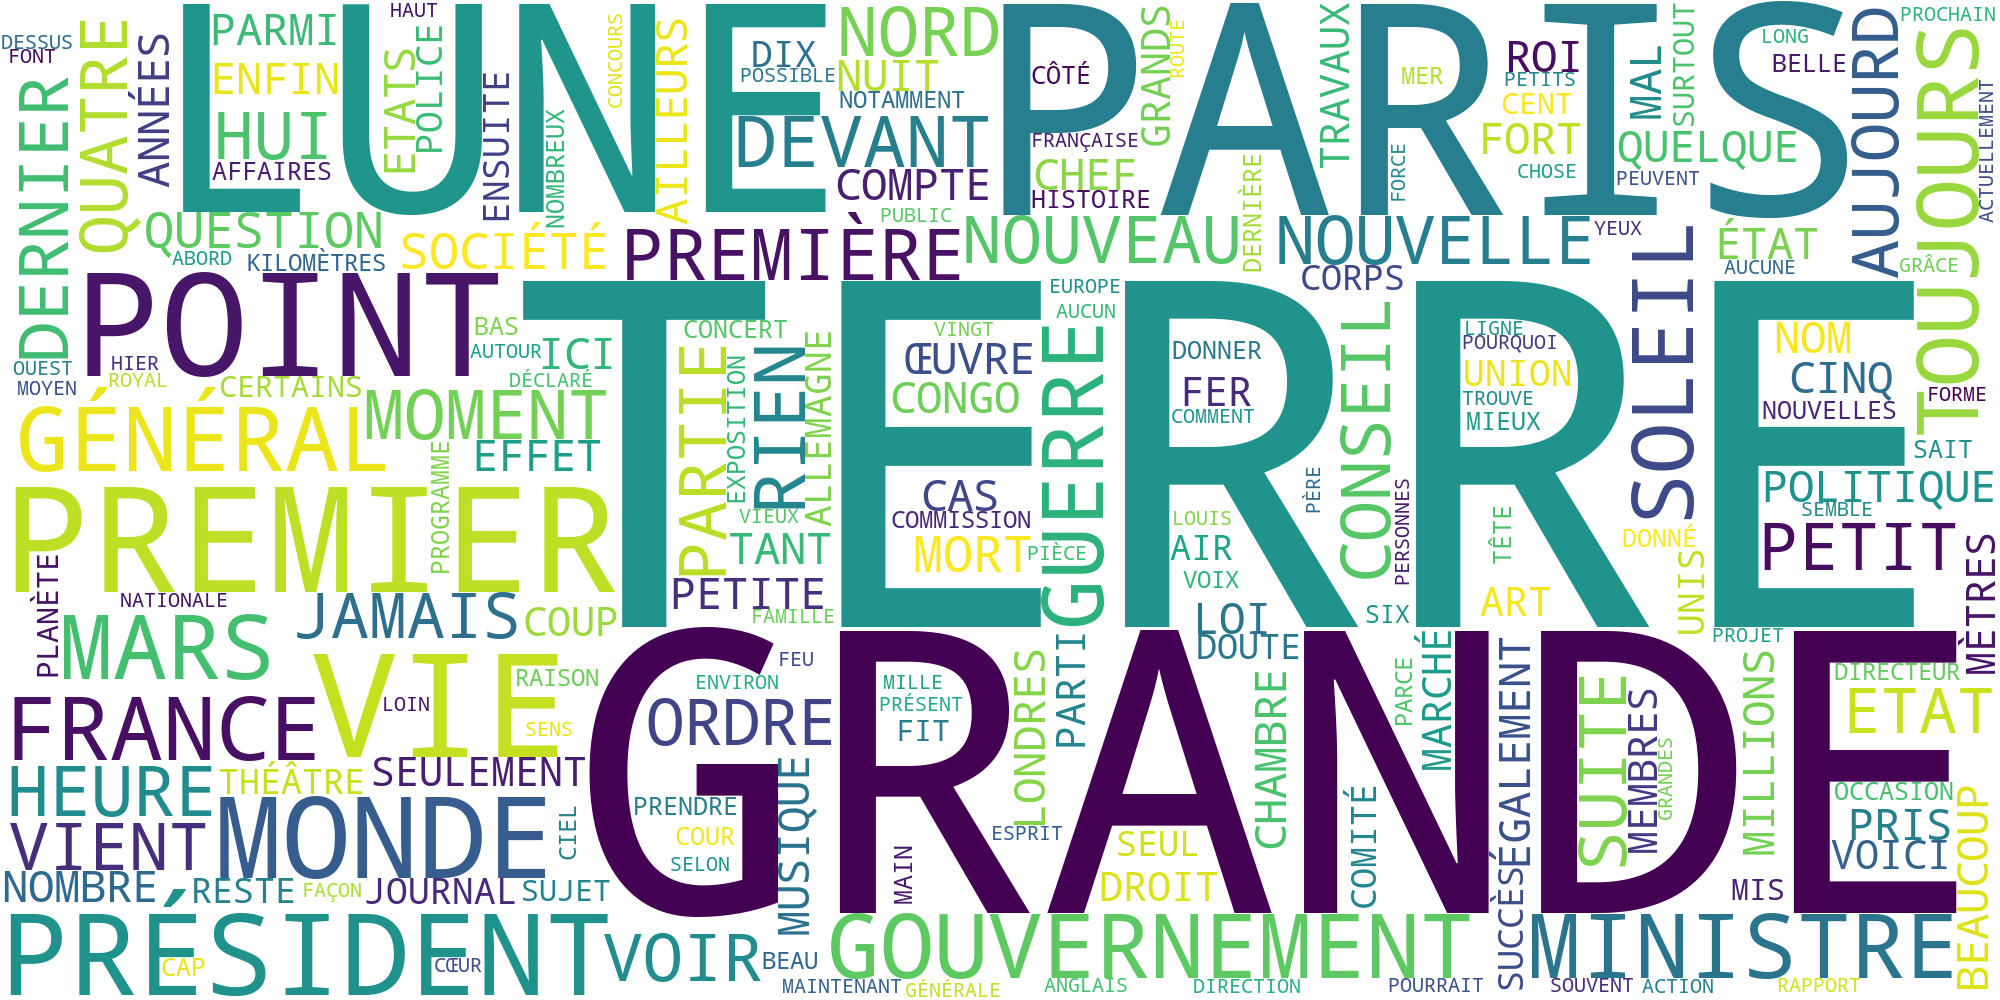

In [153]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"all.png"))
Image(filename=os.path.join(temp_path, f"all.png"))

CLUSTERING

In [158]:
data_path = "../tp4/datas/"

In [159]:
DECADE = '1966'

In [160]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [161]:
texts = [open(data_path + f).read() for f in files]

In [162]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [163]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [164]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [165]:
# Détail de la matrice
tfidf_vectors

<316x3580 sparse matrix of type '<class 'numpy.float64'>'
	with 227346 stored elements in Compressed Sparse Row format>

In [166]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

khrouchtchev    0.325224
tre             0.172277
da              0.138733
tique           0.119677
professeur      0.116981
                  ...   
henry           0.000000
heu             0.000000
heureuse        0.000000
heureux         0.000000
♦               0.000000
Length: 3580, dtype: float64

In [168]:
tfidf_array = tfidf_vectors.toarray()

In [178]:
N_CLUSTERS = 6

In [180]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [181]:
clusters = km_model.fit_predict(tfidf_vectors)

In [182]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [183]:
pprint(dict(clustering))

{0: ['KB_JB838_1960-01-02_01-00002.txt',
     'KB_JB838_1960-01-09_01-00005.txt',
     'KB_JB838_1960-01-27_01-00009.txt',
     'KB_JB838_1960-04-05_01-00005.txt',
     'KB_JB838_1960-05-18_01-00005.txt',
     'KB_JB838_1960-06-03_01-00005.txt',
     'KB_JB838_1960-08-31_01-00005.txt',
     'KB_JB838_1960-09-04_01-00005.txt',
     'KB_JB838_1960-10-04_01-00003.txt',
     'KB_JB838_1960-10-28_01-00005.txt',
     'KB_JB838_1960-11-09_01-00005.txt',
     'KB_JB838_1960-12-20_01-00005.txt',
     'KB_JB838_1960-12-30_01-00005.txt',
     'KB_JB838_1961-02-15_01-00013.txt',
     'KB_JB838_1961-07-27_01-00005.txt',
     'KB_JB838_1961-08-04_01-00005.txt',
     'KB_JB838_1961-09-01_01-00005.txt',
     'KB_JB838_1961-09-14_01-00005.txt',
     'KB_JB838_1961-09-15_01-00005.txt',
     'KB_JB838_1961-09-16_01-00005.txt',
     'KB_JB838_1961-09-17_01-00005.txt',
     'KB_JB838_1961-09-20_01-00005.txt',
     'KB_JB838_1961-09-21_01-00005.txt',
     'KB_JB838_1961-09-24_01-00005.txt',
     'KB_JB838_1

In [184]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [185]:
reduced_vectors[:10]

array([[-0.05292841, -0.19657641],
       [-0.03611723, -0.15273019],
       [ 0.17540711,  0.04523786],
       [-0.04272894, -0.00101495],
       [-0.10076613, -0.18418685],
       [-0.07369196, -0.16015656],
       [-0.09559831, -0.15336443],
       [-0.03002547, -0.10203551],
       [-0.12346836,  0.1074143 ],
       [-0.05735781, -0.04181967]])

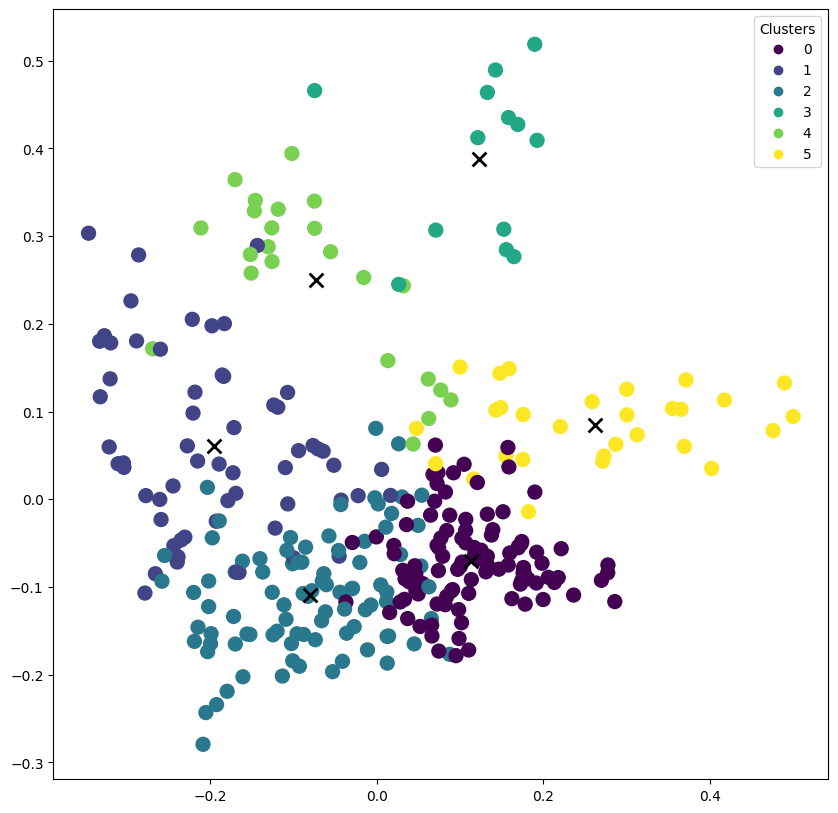

In [186]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")